### Fundamental Diagram
Not linearized yet.. Just to check 


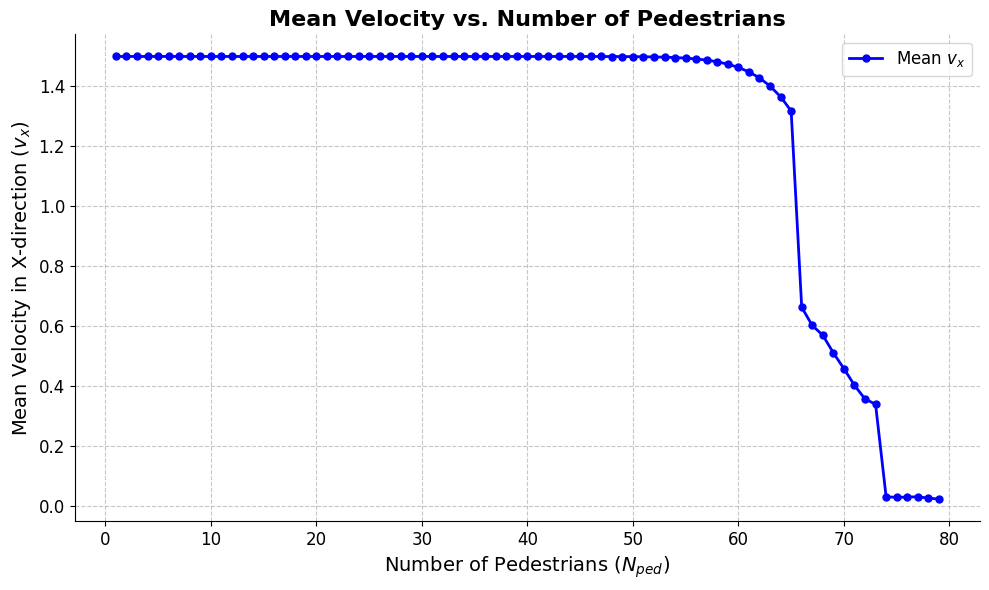

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file
file_path = 'Data_03112024\mean_velocities.txt'
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)

# Extract N_ped and Mean_vx
N_ped = data[:, 0]
Mean_vx = data[:, 1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(N_ped, Mean_vx, color='b', linewidth=2, linestyle='-', marker='o', markersize=5, label='Mean $v_x$')

# Set title and labels
ax.set_title('Mean Velocity vs. Number of Pedestrians', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Pedestrians ($N_{ped}$)', fontsize=14)
ax.set_ylabel('Mean Velocity in X-direction ($v_x$)', fontsize=14)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Add legend
ax.legend(fontsize=12)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()